In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter
import os

In [2]:
data_file_demand87 = "/workspaces/planning-the-european-electric-system-europe2/data/ERAA_2023-2/demand/cy_stress-test/demand_2025_germany.csv"
df_demand1 = pd.read_csv(data_file_demand87,sep=";",index_col=1)
df_demand1["value"] = df_demand1["value"]/1000
data_file_demand03 = "/workspaces/planning-the-european-electric-system-europe2/data/ERAA_2023-2/demand/demand_2025_germany.csv"
df_demand2 = pd.read_csv(data_file_demand03,sep=";",index_col=1)
df_demand2["value"] = df_demand2["value"]/1000
df_demand2.head(5)

,climatic_year,value
date,,
1900-01-01 00:00:00,2016,47.316
1900-01-01 01:00:00,2016,46.010
1900-01-01 02:00:00,2016,45.693
1900-01-01 03:00:00,2016,46.008
1900-01-01 04:00:00,2016,46.565


In [3]:
df_demand87 = df_demand1[df_demand1["climatic_year"]==1987]
df_demand03 = df_demand2[df_demand2["climatic_year"]==2003]
df_demand2["climatic_year"].unique()

array([2016, 2003, 1989, 2010, 1996, 1982])

In [4]:
df_other = df_demand2[df_demand2["climatic_year"]!=2003]
df_average = df_other.groupby(by="date")["value"].mean()

df_average = pd.DataFrame(df_average)
df_average["std"] = df_other.groupby(by="date")["value"].std() 
df_average["borne +"] = df_average["value"]+df_average["std"]
df_average["borne -"] = df_average["value"]-df_average["std"]

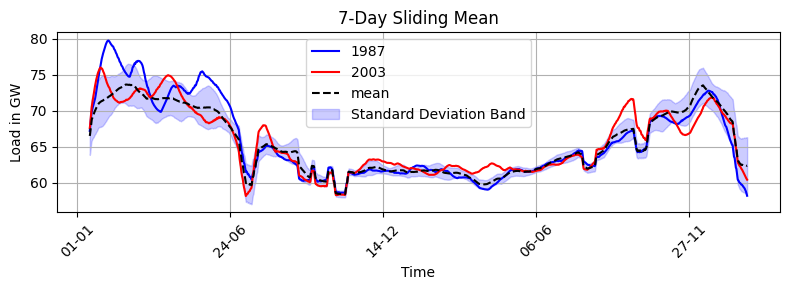

In [5]:
# Plot with the specified requirements
plt.figure(figsize=(8, 3))
df_demand87["value"].rolling(window=24*7).mean().plot(label="1987", color="blue")
df_demand03["value"].rolling(window=24*7).mean().reset_index(level=0, drop=True).plot(label="2003", color="red")
df_average["value"].rolling(window=24*7).mean().reset_index(level=0, drop=True).plot(label="mean", color="black",linestyle="--")
# Adding labels and title
plt.title("7-Day Sliding Mean")
plt.xlabel("Time")
plt.ylabel("Load in GW")
plt.fill_between(
    df_demand87.index,
    df_average["borne -"].rolling(window=24*7).mean().reset_index(level=0, drop=True),
    df_average["borne +"].rolling(window=24*7).mean().reset_index(level=0, drop=True),
    color="blue",
    alpha=0.2,
    label="Standard Deviation Band",
)

# Format x-axis to show only day and month
date_format = DateFormatter("%d-%m")  # Day-Month format
plt.gca().xaxis.set_major_formatter(date_format)
# Rotating x-axis labels
plt.xticks(rotation=45)

# Adding grid and legend
plt.grid()
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [6]:
capa_factor_solar_file = "/workspaces/planning-the-european-electric-system-europe2/data/ERAA_2023-2/res_capa-factors/capa_factor_lfsolarpv_2025_germany.csv"
df_capa_factor_solar = pd.read_csv(capa_factor_solar_file,sep=";",index_col=1)
capa_factor_wind_on_file = "/workspaces/planning-the-european-electric-system-europe2/data/ERAA_2023-2/res_capa-factors/capa_factor_wind_onshore_2025_germany.csv"
df_capa_factor_wind_on = pd.read_csv(capa_factor_wind_on_file,sep=";",index_col=1)
capa_factor_wind_off_file = "/workspaces/planning-the-european-electric-system-europe2/data/ERAA_2023-2/res_capa-factors/capa_factor_wind_offshore_2025_germany.csv"
df_capa_factor_wind_off = pd.read_csv(capa_factor_wind_off_file,sep=";",index_col=1)

In [7]:
capa_factor_solar_file1 = "/workspaces/planning-the-european-electric-system-europe2/data/ERAA_2023-2/res_capa-factors/cy_stress-test/capa_factor_lfsolarpv_2025_germany.csv"
df_capa_factor_solar87 = pd.read_csv(capa_factor_solar_file1,sep=";",index_col=1)
capa_factor_wind_on_file1 = "/workspaces/planning-the-european-electric-system-europe2/data/ERAA_2023-2/res_capa-factors/cy_stress-test/capa_factor_wind_onshore_2025_germany.csv"
df_capa_factor_wind_on87 = pd.read_csv(capa_factor_wind_on_file1,sep=";",index_col=1)
capa_factor_wind_off_file1 = "/workspaces/planning-the-european-electric-system-europe2/data/ERAA_2023-2/res_capa-factors/cy_stress-test/capa_factor_wind_offshore_2025_germany.csv"
df_capa_factor_wind_off87 = pd.read_csv(capa_factor_wind_off_file1,sep=";",index_col=1)

In [8]:
#Capa Renewables
capa_solar = 88447.85
capa_wind_on = 69017.40
capa_wind_off = 11105.00

prod_ENR = df_capa_factor_solar.copy()
prod_ENR["value"] = df_capa_factor_solar["value"]*capa_solar + df_capa_factor_wind_on["value"]*capa_wind_on + df_capa_factor_wind_off["value"]*capa_wind_off
prod_ENR["value"] = prod_ENR["value"]/1000
prod_ENR_03 = prod_ENR[prod_ENR["climatic_year"]==2003]

prod_ENR87 = df_capa_factor_solar87.copy()
prod_ENR87["value"] = df_capa_factor_solar87["value"]*capa_solar + df_capa_factor_wind_on87["value"]*capa_wind_on + df_capa_factor_wind_off87["value"]*capa_wind_off
prod_ENR87["value"] = prod_ENR87["value"]/1000
prod_ENR_87 = prod_ENR87[prod_ENR87["climatic_year"]==1987]


In [9]:
df_other = prod_ENR[prod_ENR["climatic_year"]!=2003]
df_prod_average = df_other.groupby(by="date")["value"].mean()

df_prod_average = pd.DataFrame(df_prod_average)
df_prod_average["std"] = df_other.groupby(by="date")["value"].std() 
df_prod_average["borne +"] = df_prod_average["value"]+df_prod_average["std"]
df_prod_average["borne -"] = df_prod_average["value"]-df_prod_average["std"]
df_prod_average

,value,std,borne +,borne -
date,,,,
1900-01-01 00:00:00,19.863612,4.196449,24.060061,15.667163
1900-01-01 01:00:00,19.479980,3.715443,23.195423,15.764537
1900-01-01 02:00:00,19.336237,3.132008,22.468245,16.204229
1900-01-01 03:00:00,18.758111,2.567111,21.325223,16.191000
1900-01-01 04:00:00,17.889635,2.404040,20.293675,15.485595
...,...,...,...,...
1900-12-31 19:00:00,20.012788,10.572325,30.585113,9.440463
1900-12-31 20:00:00,20.744684,10.967787,31.712471,9.776897
1900-12-31 21:00:00,21.567807,11.730672,33.298478,9.837135


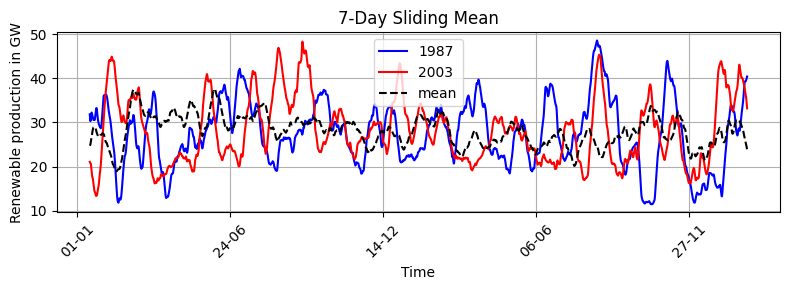

In [10]:
# Plot with the specified requirements
plt.figure(figsize=(8, 3))
prod_ENR_87["value"].rolling(window=24*7).mean().reset_index(level=0, drop=True).plot(label="1987", color="blue")
prod_ENR_03["value"].rolling(window=24*7).mean().reset_index(level=0, drop=True).plot(label="2003", color="red")
df_prod_average["value"].rolling(window=24*7).mean().reset_index(level=0, drop=True).plot(label="mean", color="black",linestyle="--")
# Adding labels and title
plt.title("7-Day Sliding Mean")
plt.xlabel("Time")
plt.ylabel("Renewable production in GW")
# plt.fill_between(
#     df_prod_average.index,
#     df_prod_average["borne -"].rolling(window=24*7).mean().reset_index(level=0, drop=True),
#     df_prod_average["borne +"].rolling(window=24*7).mean().reset_index(level=0, drop=True),
#     color="blue",
#     alpha=0.2,
#     label="Standard Deviation Band",
# )

# Adding labels and title
plt.title("7-Day Sliding Mean")
plt.xlabel("Time")
plt.ylabel("Renewable production in GW")

# Format x-axis to show only day and month
date_format = DateFormatter("%d-%m")  # Day-Month format
plt.gca().xaxis.set_major_formatter(date_format)

# Rotating x-axis labels
plt.xticks(rotation=45)

# Adding grid and legend
plt.grid()
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [11]:
res_demand03 = df_demand03-prod_ENR_03
res_demand87 = df_demand87-prod_ENR_87
res_demand_average = df_average-df_prod_average



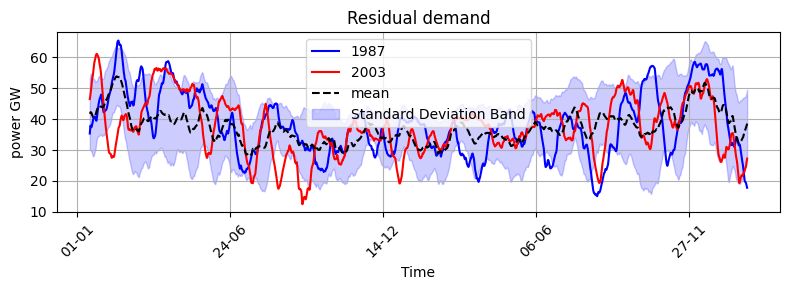

In [12]:
# Plot with the specified requirements
plt.figure(figsize=(8, 3))
res_demand87["value"].rolling(window=24*7).mean().plot(label="1987", color="blue")
res_demand03["value"].rolling(window=24*7).mean().reset_index(level=0, drop=True).plot(label="2003", color="red")
res_demand_average["value"].rolling(window=24*7).mean().reset_index(level=0, drop=True).plot(label="mean", color="black",linestyle="--")
# Adding labels and title
plt.title("Residual demand")
plt.xlabel("Time")
plt.ylabel("power GW")
plt.fill_between(
    res_demand87.index,
    res_demand_average["borne -"].rolling(window=24*7).mean().reset_index(level=0, drop=True),
    res_demand_average["borne +"].rolling(window=24*7).mean().reset_index(level=0, drop=True),
    color="blue",
    alpha=0.2,
    label="Standard Deviation Band",
)

# Format x-axis to show only day and month
date_format = DateFormatter("%d-%m")  # Day-Month format
plt.gca().xaxis.set_major_formatter(date_format)
# Rotating x-axis labels
plt.xticks(rotation=45)

# Adding grid and legend
plt.grid()
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

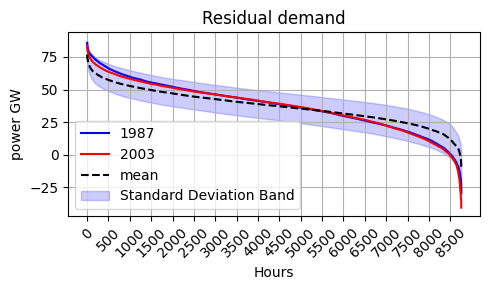

In [13]:
# Plot with the specified requirements
plt.figure(figsize=(5, 3))
res_demand87["value"].sort_values(ascending=False).plot(label="1987", color="blue")
res_demand03["value"].sort_values(ascending=False).reset_index(level=0, drop=True).plot(label="2003", color="red")
res_demand_average["value"].sort_values(ascending=False).reset_index(level=0, drop=True).plot(label="mean", color="black",linestyle="--")
# Adding labels and title
plt.title("Residual demand")
plt.xlabel("Hours")
plt.ylabel("power GW")
plt.fill_between(
    res_demand87["value"].sort_values(ascending=False).index,
    res_demand_average["borne -"].sort_values(ascending=False).reset_index(level=0, drop=True),
    res_demand_average["borne +"].sort_values(ascending=False).reset_index(level=0, drop=True),
    color="blue",
    alpha=0.2,
    label="Standard Deviation Band",
)
# Define custom tick locations (e.g., every 500 hours)
ticks = range(0, 8761, 500)

# Convert tick values to readable labels (e.g., hours as days or custom labels)

# Set the custom tick labels on the x-axis
plt.xticks(ticks,ticks)
plt.xticks(rotation=45)
# Adding grid and legend
plt.grid()
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [14]:
#DEMAND

PATH1 = "/workspaces/planning-the-european-electric-system-europe2/data/ERAA_2023-2/demand/"
PATH2 = "/workspaces/planning-the-european-electric-system-europe2/data/ERAA_2023-2/demand/cy_stress-test/"
year = 2025
list_files = []
countries = []
for file in os.listdir(PATH1):
    split_file = file.split("_")
    if len(split_file)==3:
        if split_file[1] == str(year):
            full_path = os.path.join(PATH1,file)
            list_files.append(full_path)
            country_name = split_file[2].split(".")[0]
            countries.append(country_name)
list_df = []
for file in list_files:
    df_demand =  pd.read_csv(file,sep=";",index_col=1)
    df_demand["value"] = df_demand["value"]/1000
    list_df.append(df_demand)
# Extract only the 'value' column from each DataFrame and rename for distinction
value_columns = [df["value"].rename(f"{name}") for name, df in zip(countries,list_df)]

# Merge all 'value' columns side-by-side
merged_values = pd.concat(value_columns, axis=1)

# Add 'climatic_year' and align with the merged values
climatic_year = list_df[0]["climatic_year"]  # Assume the same across DataFrames
df_demand_agg1 = pd.concat([climatic_year, merged_values], axis=1)

list_files = []
countries = []
for file in os.listdir(PATH2):
    split_file = file.split("_")
    if len(split_file)==3:
        if split_file[1] == str(year):
            full_path = os.path.join(PATH2,file)
            list_files.append(full_path)
            country_name = split_file[2].split(".")[0]
            countries.append(country_name)
list_df = []
for file in list_files:
    df_demand =  pd.read_csv(file,sep=";",index_col=1)
    df_demand["value"] = df_demand["value"]/1000
    list_df.append(df_demand)
# Extract only the 'value' column from each DataFrame and rename for distinction
value_columns = [df["value"].rename(f"{name}") for name, df in zip(countries,list_df)]

# Merge all 'value' columns side-by-side
merged_values = pd.concat(value_columns, axis=1)

# Add 'climatic_year' and align with the merged values
climatic_year = list_df[0]["climatic_year"]  # Assume the same across DataFrames
df_demand_agg2 = pd.concat([climatic_year, merged_values], axis=1)

df_demand_agg = pd.concat([df_demand_agg1,df_demand_agg2])
df_demand_agg["climatic_year"].unique()

array([2016, 2003, 1989, 2010, 1996, 1982, 1985, 1987])

In [15]:
CAPA_COUNTRIES = {
    "benelux":{
        "Solar":47892.74,
        "Wind Offshore":8399.00,
        "Wind Onshore":10898.05
        },
    "france":{
        "Solar":18184.99,
        "Wind Offshore":2015.00,
        "Wind Onshore":24058.99
        },
    "germany":{
        "Solar":88447.85,
        "Wind Offshore":11105.00,
        "Wind Onshore":69017.40
        },
    "iberian-peninsula":{
        "Solar":40177.08,
        "Wind Offshore":88.00,
        "Wind Onshore":41216.73
        },
    "italy":{
        "Solar":39954.39,
        "Wind Offshore":790.70,
        "Wind Onshore":14512.02
        },
    "poland":{
        "Solar":16049.00,
        "Wind Offshore":0.,
        "Wind Onshore":10930.32
        },
    "scandinavia":{
        "Solar":12108.45,
        "Wind Offshore":2447.30,
        "Wind Onshore":39318.31
        },
}


In [16]:
#PROD ENR

PATH1 = "/workspaces/planning-the-european-electric-system-europe2/data/ERAA_2023-2/res_capa-factors"
PATH2 = "/workspaces/planning-the-european-electric-system-europe2/data/ERAA_2023-2/res_capa-factors/cy_stress-test"
year = 2025
list_files = []
countries = []
for file in os.listdir(PATH1):
    split_file = file.split("_")
    if len(split_file)>2:
        if split_file[-2] == str(year):
            if split_file[2] in ["wind", "lfsolarpv"]:
                full_path = os.path.join(PATH1,file)
                list_files.append(full_path)
                country_name = split_file[-1].split(".")[0]
                countries.append(country_name)


list_df = []
for file,country in zip(list_files,countries):
    energy = ""
    if "solar" in file:
        energy = "Solar"
    elif "wind_offshore" in file:
        energy = "Wind Offshore"
    elif "wind_onshore" in file:
        energy = "Wind Onshore"
    else:
        print("no energy found")
        stop
    df_prod =  pd.read_csv(file,sep=";",index_col=1)
    # print(country,energy,CAPA_COUNTRIES[country][energy])
    df_prod["value"] = df_prod["value"]*CAPA_COUNTRIES[country][energy]/1000
    list_df.append(df_prod)
# # Extract only the 'value' column from each DataFrame and rename for distinction
value_columns = [df["value"].rename(f"{name}") for name, df in zip(countries,list_df)]

# # Merge all 'value' columns side-by-side
merged_values = pd.concat(value_columns, axis=1)

# # Add 'climatic_year' and align with the merged values
climatic_year = list_df[0]["climatic_year"]  # Assume the same across DataFrames
df_prod_agg1 = pd.concat([climatic_year, merged_values], axis=1)

excluded_column = 'climatic_year'
excluded_df = df_prod_agg1[[excluded_column]]  # Keep the excluded column intact

# Process the rest of the columns
summable_df = df_prod_agg1.drop(columns=[excluded_column])
summed_df = summable_df.groupby(summable_df.columns, axis=1).sum()
df_prod_agg1 = pd.concat([excluded_df, summed_df], axis=1)

list_files = []
countries = []
for file in os.listdir(PATH2):
    split_file = file.split("_")
    if len(split_file)>2:
        if split_file[-2] == str(year):
            if split_file[2] in ["wind", "lfsolarpv"]:
                full_path = os.path.join(PATH2,file)
                list_files.append(full_path)
                country_name = split_file[-1].split(".")[0]
                countries.append(country_name)


list_df = []
for file,country in zip(list_files,countries):
    energy = ""
    if "solar" in file:
        energy = "Solar"
    elif "wind_offshore" in file:
        energy = "Wind Offshore"
    elif "wind_onshore" in file:
        energy = "Wind Onshore"
    else:
        print("no energy found")
        stop
    df_prod =  pd.read_csv(file,sep=";",index_col=1)
    # print(country,energy,CAPA_COUNTRIES[country][energy])
    df_prod["value"] = df_prod["value"]*CAPA_COUNTRIES[country][energy]/1000
    list_df.append(df_prod)
# # Extract only the 'value' column from each DataFrame and rename for distinction
value_columns = [df["value"].rename(f"{name}") for name, df in zip(countries,list_df)]

# # Merge all 'value' columns side-by-side
merged_values = pd.concat(value_columns, axis=1)

# # Add 'climatic_year' and align with the merged values
climatic_year = list_df[0]["climatic_year"]  # Assume the same across DataFrames
df_prod_agg2 = pd.concat([climatic_year, merged_values], axis=1)

excluded_column = 'climatic_year'
excluded_df = df_prod_agg2[[excluded_column]]  # Keep the excluded column intact

# Process the rest of the columns
summable_df = df_prod_agg2.drop(columns=[excluded_column])
summed_df = summable_df.groupby(summable_df.columns, axis=1).sum()
df_prod_agg2 = pd.concat([excluded_df, summed_df], axis=1)

df_prod_agg = pd.concat([df_prod_agg1,df_prod_agg2])
df_prod_agg["climatic_year"].unique()


/tmp/ipykernel_32190/1571010112.py:50: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  summed_df = summable_df.groupby(summable_df.columns, axis=1).sum()
/tmp/ipykernel_32190/1571010112.py:97: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  summed_df = summable_df.groupby(summable_df.columns, axis=1).sum()


array([2016, 2003, 1989, 2010, 1996, 1982, 1985, 1987])

In [17]:
df_demand_res = df_demand_agg.copy()
order = df_demand_res.columns
df_prod_agg = df_prod_agg.loc[:,order]
df_demand_res.loc[:,df_demand_res.columns[1:]] = df_demand_res.loc[:,df_demand_res.columns[1:]].sub(df_prod_agg.loc[:,df_prod_agg.columns[1:]])
df_demand_res


,climatic_year,benelux,scandinavia,germany,italy,france,poland,iberian-peninsula
date,,,,,,,,
1900-01-01 00:00:00,2016,11.352641,27.577020,26.037408,20.926942,51.610411,11.711719,21.274907
1900-01-01 01:00:00,2016,12.411481,26.917044,24.896428,19.560432,50.274241,11.700396,18.268056
1900-01-01 02:00:00,2016,13.535707,26.733151,25.182317,18.898247,48.191880,11.903584,16.268588
1900-01-01 03:00:00,2016,15.569379,27.755780,26.536412,18.728944,47.004440,12.699912,14.379170
1900-01-01 04:00:00,2016,17.569037,29.958931,28.905191,18.987177,46.882499,12.235239,12.017850
...,...,...,...,...,...,...,...,...
1900-12-31 19:00:00,1987,12.797308,37.698916,26.242046,35.643145,49.370480,13.298954,21.317885
1900-12-31 20:00:00,1987,11.293698,35.828033,23.250806,33.123857,48.085835,11.910498,23.615122
1900-12-31 21:00:00,1987,10.804069,33.651173,21.897494,29.964190,51.079615,11.091714,23.075200


In [40]:
df_demand_res.loc[:,df_demand_res.columns[1:]].sum(axis=1)
df_demand_res.groupby(by="date").std().loc[:,df_demand_res.columns[1:]].sum(axis=1)

date
1900-01-01 00:00:00    49.567005
1900-01-01 01:00:00    49.043005
1900-01-01 02:00:00    48.118069
1900-01-01 03:00:00    47.160826
1900-01-01 04:00:00    46.124468
                         ...    
1900-12-31 19:00:00    44.360487
1900-12-31 20:00:00    44.156213
1900-12-31 21:00:00    44.152856
1900-12-31 22:00:00    44.555565
1900-12-31 23:00:00    44.875222
Length: 8760, dtype: float64

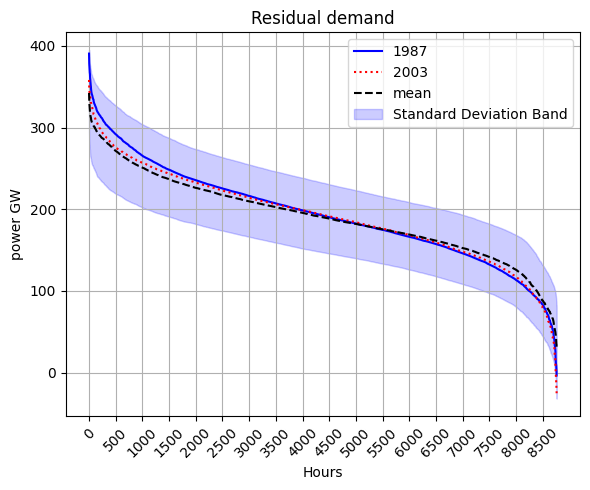

In [43]:
# Plot with the specified requirements
plt.figure(figsize=(6, 5))
df_demand_res[df_demand_res["climatic_year"]==1987].loc[:,df_demand_res.columns[1:]].sum(axis=1).sort_values(ascending=False).reset_index(level=0, drop=True).plot(label="1987", color="blue")
df_demand_res[df_demand_res["climatic_year"]==2003].loc[:,df_demand_res.columns[1:]].sum(axis=1).sort_values(ascending=False).reset_index(level=0, drop=True).plot(label="2003", color="red",linestyle=":")
df_demand_res.groupby(by="date").mean().loc[:,df_demand_res.columns[1:]].sum(axis=1).sort_values(ascending=False).reset_index(level=0, drop=True).plot(label="mean", color="black",linestyle="--")
# res_demand03["value"].sort_values(ascending=False).reset_index(level=0, drop=True).plot(label="2003", color="red")
# res_demand_average["value"].sort_values(ascending=False).reset_index(level=0, drop=True).plot(label="mean", color="black",linestyle="--")
# Adding labels and title
plt.title("Residual demand")
plt.xlabel("Hours")
plt.ylabel("power GW")
borne_min = df_demand_res.groupby(by="date").mean().loc[:,df_demand_res.columns[1:]].sum(axis=1) - df_demand_res.groupby(by="date").std().loc[:,df_demand_res.columns[1:]].sum(axis=1)
borne_sup = df_demand_res.groupby(by="date").mean().loc[:,df_demand_res.columns[1:]].sum(axis=1) + df_demand_res.groupby(by="date").std().loc[:,df_demand_res.columns[1:]].sum(axis=1)
plt.fill_between(
    res_demand87["value"].sort_values(ascending=False).index,
    borne_min.sort_values(ascending=False).reset_index(level=0, drop=True),
    borne_sup.sort_values(ascending=False).reset_index(level=0, drop=True),
    color="blue",
    alpha=0.2,
    label="Standard Deviation Band",
)
# Define custom tick locations (e.g., every 500 hours)
ticks = range(0, 8761, 500)

# Convert tick values to readable labels (e.g., hours as days or custom labels)

# Set the custom tick labels on the x-axis
plt.xticks(ticks,ticks)
plt.xticks(rotation=45)
# Adding grid and legend
plt.grid()
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

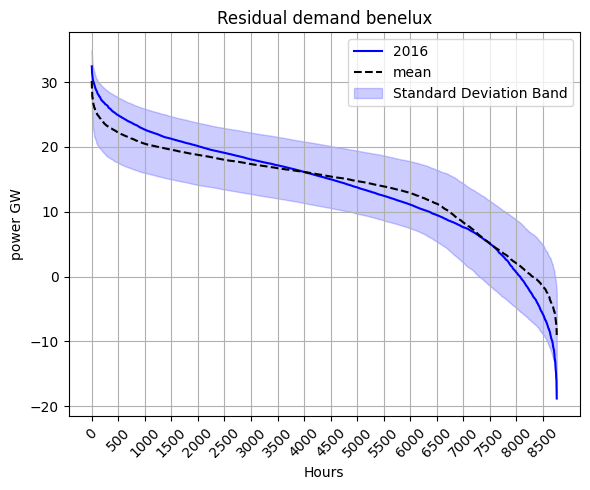

In [51]:
# Plot with the specified requirements
plt.figure(figsize=(6, 5))
df_demand_res[df_demand_res["climatic_year"]==2016].loc[:,"benelux"].sort_values(ascending=False).reset_index(level=0, drop=True).plot(label="2016", color="blue")

# df_demand_res[df_demand_res["climatic_year"]==1987].loc[:,"benelux"].sort_values(ascending=False).reset_index(level=0, drop=True).plot(label="1987", color="blue")
# df_demand_res[df_demand_res["climatic_year"]==2003].loc[:,"benelux"].sort_values(ascending=False).reset_index(level=0, drop=True).plot(label="2003", color="red",linestyle=":")
df_demand_res.groupby(by="date").mean().loc[:,"benelux"].sort_values(ascending=False).reset_index(level=0, drop=True).plot(label="mean", color="black",linestyle="--")
# Adding labels and title
plt.title("Residual demand benelux")
plt.xlabel("Hours")
plt.ylabel("power GW")
borne_min = df_demand_res.groupby(by="date").mean().loc[:,"benelux"] - df_demand_res.groupby(by="date").std().loc[:,"benelux"]
borne_sup = df_demand_res.groupby(by="date").mean().loc[:,"benelux"] + df_demand_res.groupby(by="date").std().loc[:,"benelux"]
plt.fill_between(
    res_demand87["value"].sort_values(ascending=False).index,
    borne_min.sort_values(ascending=False).reset_index(level=0, drop=True),
    borne_sup.sort_values(ascending=False).reset_index(level=0, drop=True),
    color="blue",
    alpha=0.2,
    label="Standard Deviation Band",
)
# Define custom tick locations (e.g., every 500 hours)
ticks = range(0, 8761, 500)

# Convert tick values to readable labels (e.g., hours as days or custom labels)

# Set the custom tick labels on the x-axis
plt.xticks(ticks,ticks)
plt.xticks(rotation=45)
# Adding grid and legend
plt.grid()
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [46]:
df_demand_res[df_demand_res["climatic_year"]==2003].loc[:,"iberian-peninsula"]

date
1900-01-01 00:00:00     1.973010
1900-01-01 01:00:00    -0.222507
1900-01-01 02:00:00    -1.224557
1900-01-01 03:00:00    -1.144355
1900-01-01 04:00:00    -1.186671
                         ...    
1900-12-31 19:00:00    28.495300
1900-12-31 20:00:00    28.850484
1900-12-31 21:00:00    27.641025
1900-12-31 22:00:00    25.847019
1900-12-31 23:00:00    23.174085
Name: iberian-peninsula, Length: 8760, dtype: float64